# The Data is to be analyised and Increse the profits #task-3

The dataset is given by The Spark Foundation


Author:-Lopinti Abhijeeth Baba

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import datasets 
%matplotlib inline

C:\Users\Captain\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv("Begginer-3.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
corr_matrix = data.corr()
corr_matrix['Profit'].sort_values(ascending=False)

Profit         1.000000
Sales          0.479064
Quantity       0.066253
Postal Code   -0.029961
Discount      -0.219487
Name: Profit, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000254DFC00048>,
      dtype=object)

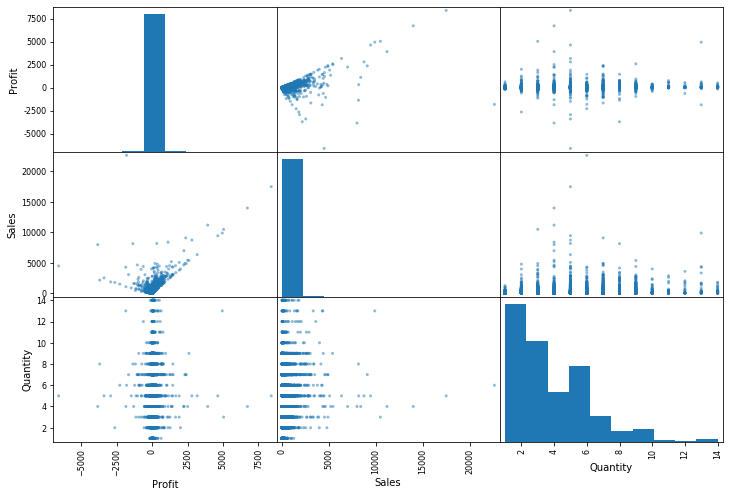

In [5]:
from pandas.plotting import scatter_matrix
attributes = ["Profit", "Sales", "Quantity"]
scatter_matrix(data[attributes], figsize = (12,8))

In [6]:
loss={}
profit={}

for x in data:
    if data[x].dtype != 'float64' :
        print('Profit Correlation by:', x)
#         print(data[[x,'Profit']].groupby(x, as_index=False).mean())
        
        l=[]
        p=[]
        i=data[[x,'Profit']].groupby(x, as_index=False).mean()
        print(i)
       
        for j in range (len(i['Profit'])):
            if i['Profit'][j]<20:
                l.append(i[x][j])
            else:
                p.append(i[x][j])
#         if i['Profit'][]
#         print(i['Profit'])
        loss[x]=l
        profit[x]=p
        
        print('-'*10, '\n')
        
        

#using crosstabs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html
# print(pd.crosstab(data['Title'],data[Target[0]]))

Profit Correlation by: Ship Mode
        Ship Mode     Profit
0     First Class  31.839948
1        Same Day  29.266591
2    Second Class  29.535545
3  Standard Class  27.494770
---------- 

Profit Correlation by: Segment
       Segment     Profit
0     Consumer  25.836873
1    Corporate  30.456667
2  Home Office  33.818664
---------- 

Profit Correlation by: Country
         Country     Profit
0  United States  28.656896
---------- 

Profit Correlation by: City
            City      Profit
0       Aberdeen    6.630000
1        Abilene   -3.758400
2          Akron   -8.887410
3    Albuquerque   45.292007
4     Alexandria   19.913644
..           ...         ...
526   Woonsocket   19.669775
527      Yonkers  184.517047
528         York  -20.433840
529      Yucaipa   13.208000
530         Yuma -116.497725

[531 rows x 2 columns]
---------- 

Profit Correlation by: State
                   State      Profit
0                Alabama   94.865989
1                Arizona  -15.303235
2       

In [7]:
# print(loss)
# print(profit)


In [8]:
print("The Categories that are running in profits")

for i in profit.keys():
    print(i)

The Categories that are running in profits
Ship Mode
Segment
Country
City
State
Postal Code
Region
Category
Sub-Category
Quantity


In [9]:
print(profit['Ship Mode'])
print(profit['Segment'])
print(profit['Category'])
print(profit['Quantity'])

['First Class', 'Same Day', 'Second Class', 'Standard Class']
['Consumer', 'Corporate', 'Home Office']
['Office Supplies', 'Technology']
[3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14]


In [10]:
print(loss['Ship Mode'])
print(loss['Segment'])
print(loss['Category'])
print(loss['Quantity'])

[]
[]
['Furniture']
[1, 2, 6]


In [11]:
print("So by the above output we can know that the profits are not high in Furniture and Need to increase the Quantity")

So by the above output we can know that the profits are not high in Furniture and Need to increase the Quantity


In [12]:
data.drop_duplicates(inplace=True)
data.shape

(9977, 13)

In [13]:
removeun=data.drop(columns='Postal Code')

In [14]:
removeun

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


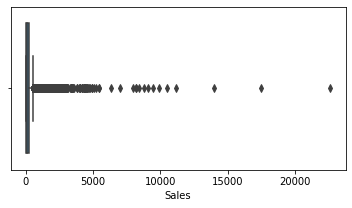

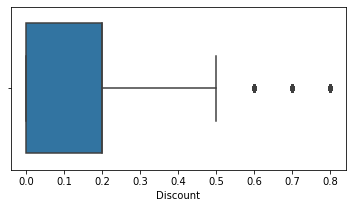

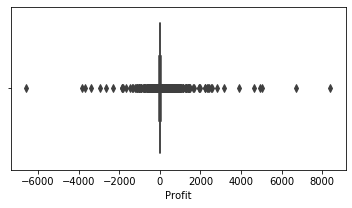

In [15]:

for i in removeun:
    if removeun[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sb.boxplot(removeun[i])

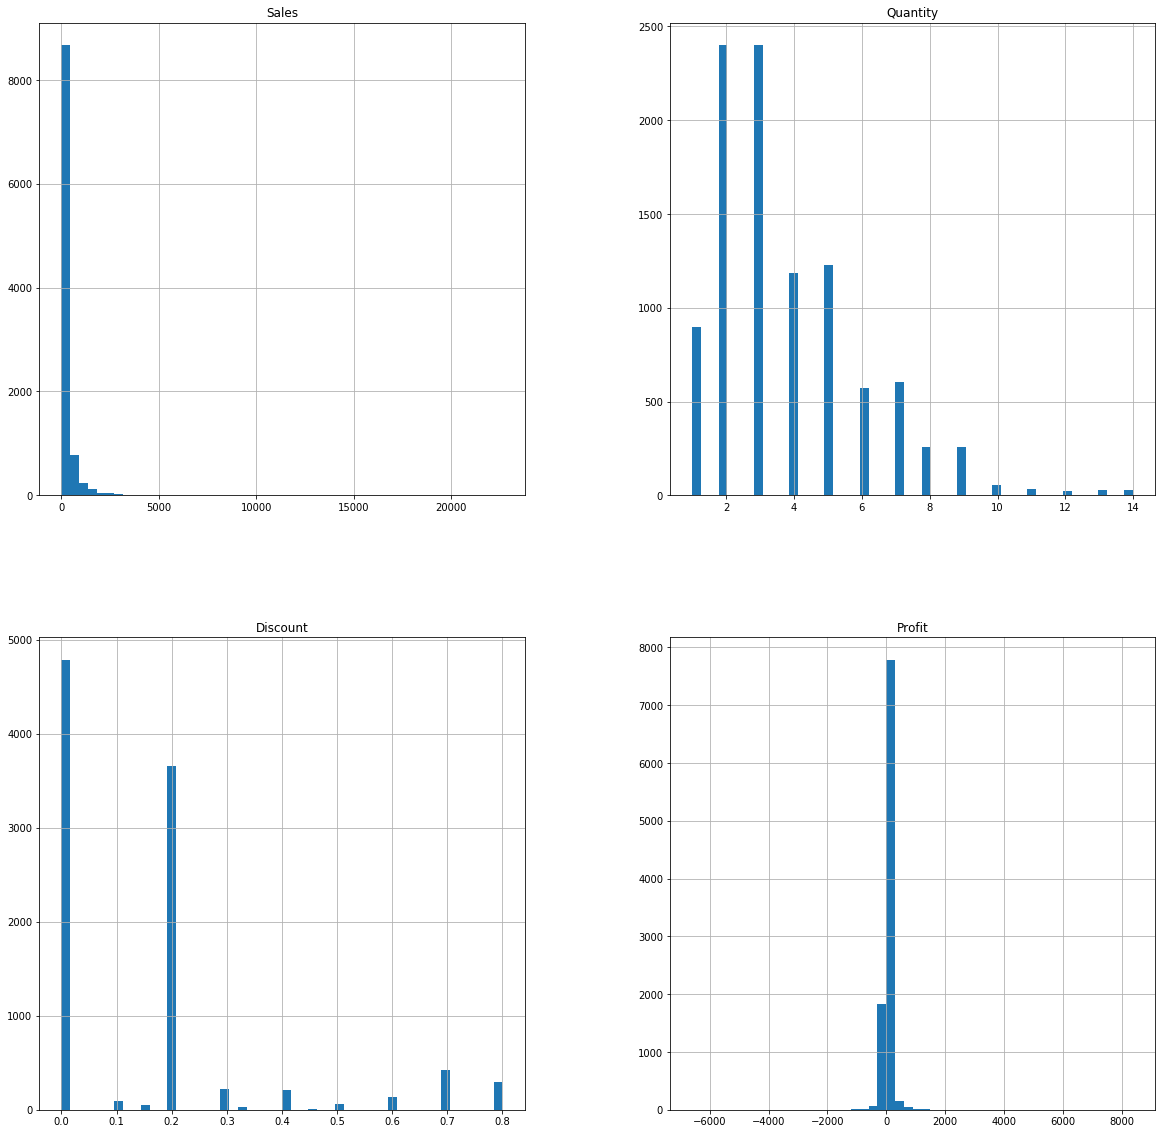

In [16]:
removeun.hist(bins=50,figsize=(20,20))
plt.show()

In [17]:
s=(removeun['Segment'].value_counts()/len(removeun['Segment'])*100)
sh=(removeun['Ship Mode'].value_counts()/len(removeun['Ship Mode'])*100)
c=(removeun['Category'].value_counts()/len(removeun['Category'])*100)

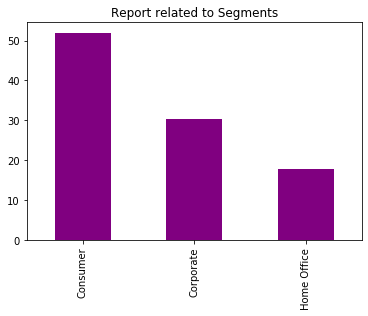

In [18]:
s.plot(kind='bar',color='purple',title='Report related to Segments')

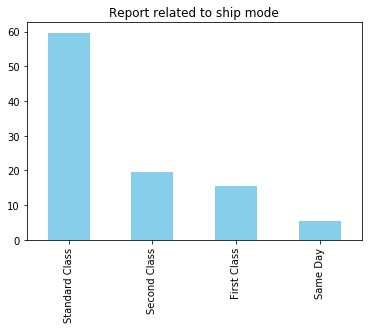

In [19]:
sh.plot(kind='bar',color='skyblue',title='Report related to ship mode')

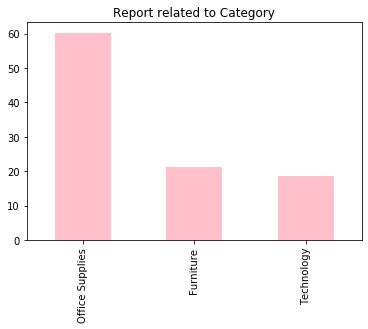

In [20]:
c.plot(kind='bar',color='pink',title='Report related to Category')

In [21]:
sub=(removeun['Sub-Category'].value_counts()/len(removeun['Sub-Category'])*100)
sub

Binders        15.255087
Paper          13.621329
Furnishings     9.582039
Phones          8.910494
Storage         8.479503
Art             7.968327
Accessories     7.767866
Chairs          6.164178
Appliances      4.670743
Labels          3.638368
Tables          3.197354
Envelopes       2.545855
Bookcases       2.285256
Fasteners       2.175003
Supplies        1.904380
Machines        1.152651
Copiers         0.681568
Name: Sub-Category, dtype: float64

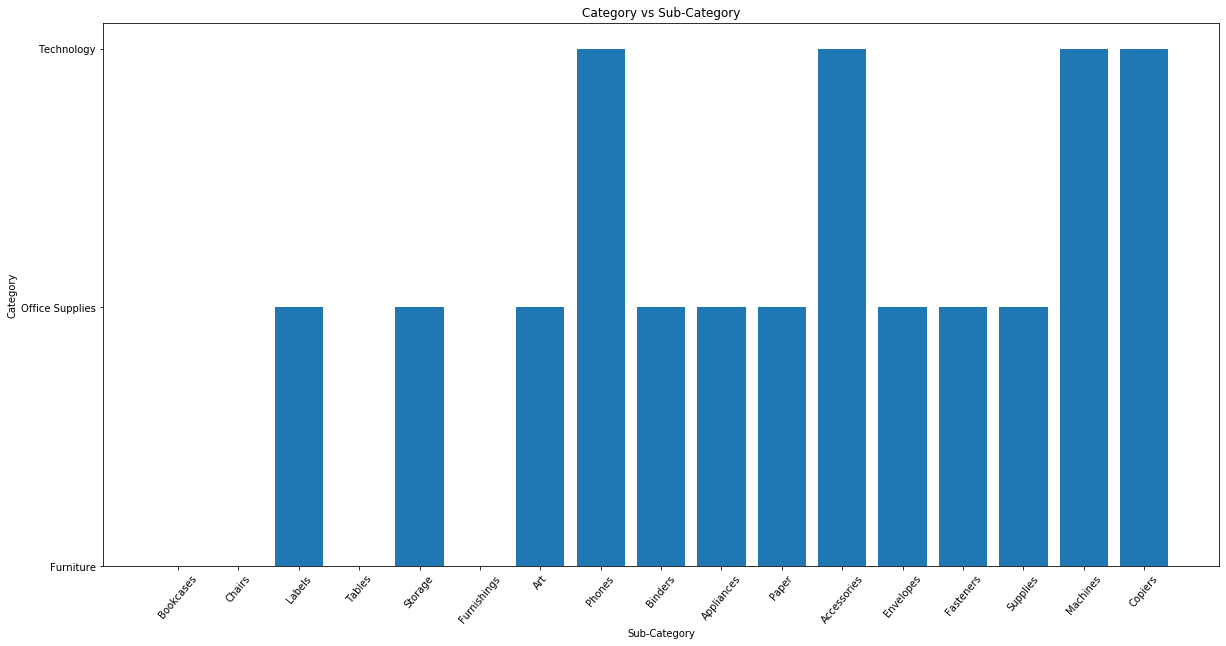

In [22]:
plt.figure(figsize=(20,10))
plt.bar('Sub-Category','Category', data=removeun)
plt.title('Category vs Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Category')
plt.xticks(rotation=50)
plt.show()

In [23]:
removeun.pivot_table(values='Sales',index='Segment',columns='Discount',aggfunc='median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,51.98,365.598,307.666,51.764,361.011,328.3992,289.404,353.24025,292.100,23.526,12.051,8.568
Corporate,59.10,245.646,480.165,52.272,347.361,307.6660,338.679,562.29250,302.450,21.936,12.060,9.312
Home Office,49.90,191.646,411.332,52.716,366.744,341.9992,212.856,427.23725,433.935,22.608,12.957,8.769


In [24]:
removeun.pivot_table(values='Profit',index='Segment',columns='Discount',aggfunc='median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,16.14600,62.0390,5.12940,6.0433,-26.0562,-30.0980,-47.21360,-135.68145,-175.2600,-14.1323,-8.7276,-13.7175
Corporate,16.35285,46.7908,26.27735,6.7068,-28.2240,-59.0606,-87.27495,-255.58750,-120.5130,-10.4196,-8.9796,-16.7130
Home Office,15.45460,37.2300,16.79860,7.2576,-18.2220,-57.3234,-49.71900,-175.14690,-237.8425,-14.2290,-9.7608,-14.0328


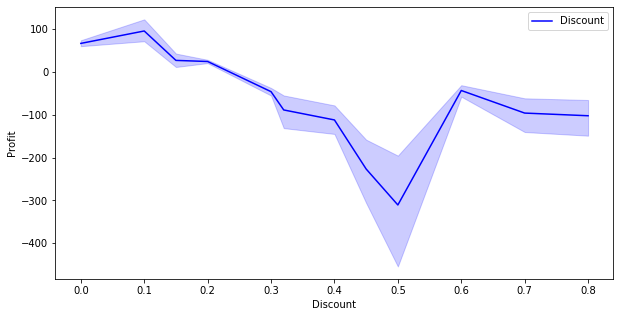

In [25]:
plt.figure(figsize=(10,5))
sb.lineplot("Discount", "Profit", data=removeun, color='b',label='Discount')
plt.legend()
plt.show()

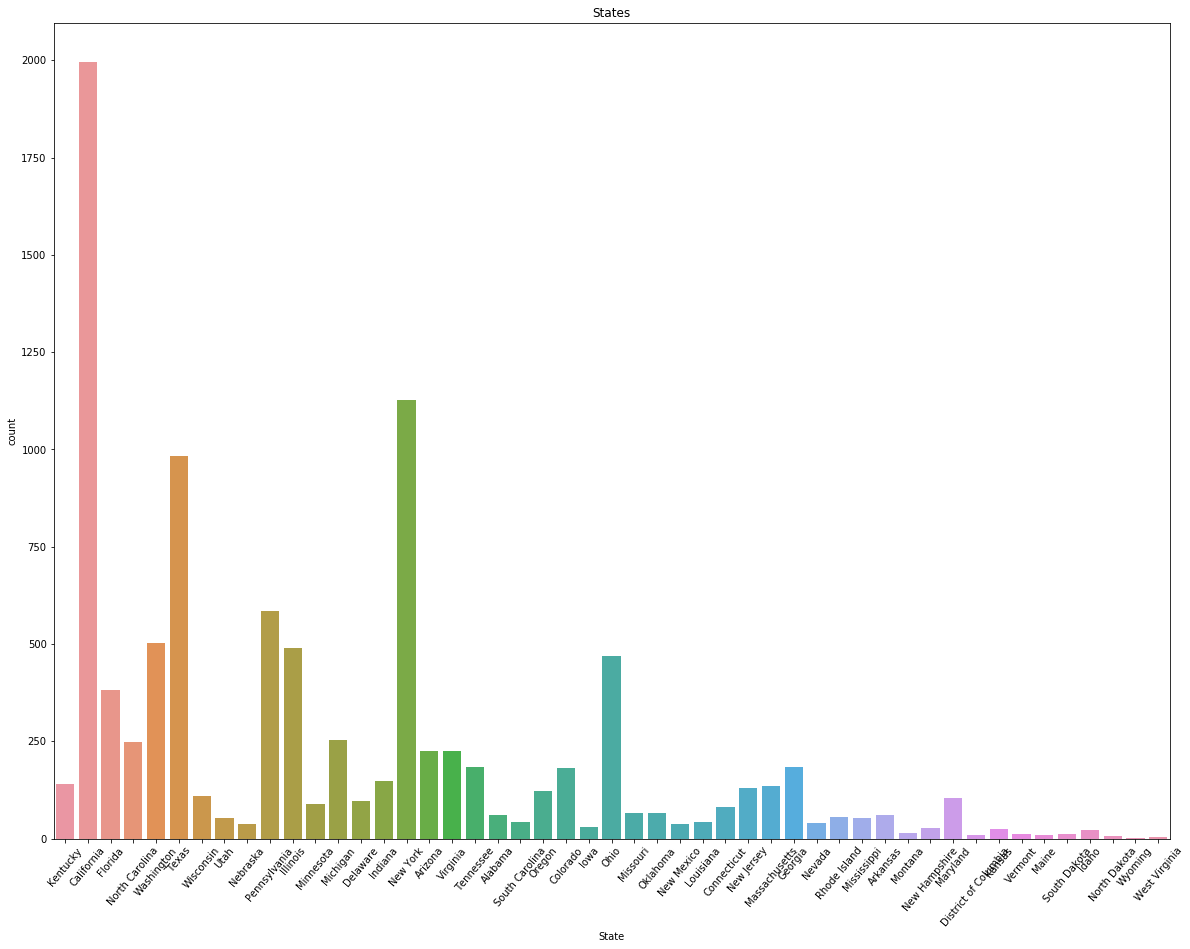

In [26]:
plt.figure(figsize=(20,15))
sb.countplot(x=removeun['State'])
plt.xticks(rotation=50)
plt.title('States')
plt.show()

In [27]:
state_data = removeun[['Sales', 'Profit', 'State']].groupby(['State']).sum()

In [28]:
state_data

,Sales,Profit
State,,
Alabama,19510.6400,5786.8253
Arizona,35282.0010,-3427.9246
Arkansas,11678.1300,4008.6871
California,457576.2715,76330.7891
Colorado,32108.1180,-6527.8579
Connecticut,13384.3570,3511.4918
Delaware,27451.0690,9977.3748
District of Columbia,2865.0200,1059.5893
Florida,89473.7080,-3399.3017


# Conclusion
The counclusion is that various Factors are mentioned at the plot itself.
Some of the code is refered from Purba Chakraborty(Thanks)  

# Thank you